### Author - Vaishnvee yede

### Task 2- Movie rating prediction with Python

### Domain - Data Science

# Movie rating prediction with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score

# Step 1: Load and Inspect the Dataset

In [2]:
# Load the dataset

movies_df = pd.read_csv("D:/codesoft projects/archive (1)/IMDb Movies India.csv", encoding='ISO-8859-1')


In [3]:
movies_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
movies_df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [6]:
movies_df.shape

(15509, 10)

In [7]:
print(movies_df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
movies_df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [10]:
# Statistical Summary
movies_df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Step 2: Preprocess the Data

In [11]:
# data cleaning
movies_df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [12]:
# number of unique values in each column.
movies_df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [13]:
print(movies_df.duplicated().sum())

6


In [14]:
# removing nan values
movies_df= movies_df.dropna(subset=["Year","Genre","Director","Actor 1","Actor 2","Actor 3","Rating"])

In [15]:
movies_df = movies_df.dropna().reset_index(drop=True)

In [16]:
# Convert Duration to numeric
movies_df['Duration'] = movies_df['Duration'].str.replace(' min', '', regex=False).astype(float)

# Convert Votes to numeric
movies_df['Votes'] = movies_df['Votes'].str.replace(',', '').astype(float)


In [17]:
# Remove duplicates based on specific columns
movies_df = movies_df.drop_duplicates(subset=['Name', 'Year'])


In [18]:
movies_df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [19]:
movies_df.dropna(subset=['Rating', 'Votes'], inplace=True)
director_description = movies_df['Director'].describe()

director_counts = movies_df['Director'].value_counts().sort_values(ascending=False)
movies_df['Director'].fillna('rajmouli', inplace=True)

genre_counts = movies_df['Genre'].value_counts().sort_values(ascending=False)
movies_df['Genre'].fillna('Action', inplace=True)

actor1_description = movies_df['Actor 1'].describe()
movies_df['Actor 1'].fillna('mahesh babu', inplace=True)

missing_values_df = pd.DataFrame({
    'Missing Values': movies_df.isnull().sum(),
    'Percentage': (movies_df.isnull().sum() / len(movies_df) * 100).round(2)
})

movies_df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
5654,Zubaan,(2015),115.0,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,(2001),153.0,"Biography, Drama, History",6.2,1496.0,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,(1989),125.0,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,(1999),129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
5658,Zulm-O-Sitam,(1998),130.0,"Action, Drama",6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [21]:
movies_df['Year'].fillna(0, inplace=True)
movies_df['Duration'].fillna(0, inplace=True)
movies_df['Actor 1'].fillna(0, inplace=True)
movies_df['Actor 2'].fillna(0, inplace=True)
movies_df['Actor 3'].fillna(0,inplace=True)

In [22]:
movies_df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [24]:
# Cleaning Genre and year columns and adding new genre column for further analysis

movies_df['Year'] = movies_df['Year'].astype(str)

# Cleaning the 'Year' column by extracting the four-digit year
movies_df['Year'] = movies_df['Year'].str.extract(r'(\d{4})')

# Convert the extracted year to numeric
movies_df['Year'] = pd.to_numeric(movies_df['Year'])



# Step 3 -  Exploratory Data Analysis (EDA)

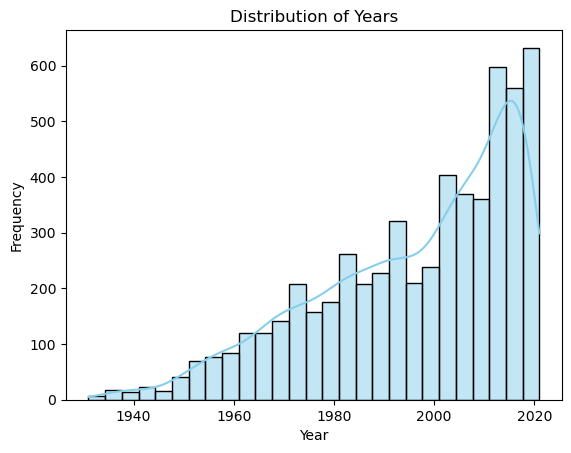

In [25]:
# univariate analysis
sns.histplot(movies_df["Year"], kde=True,color='skyblue')  
plt.title("Distribution of Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

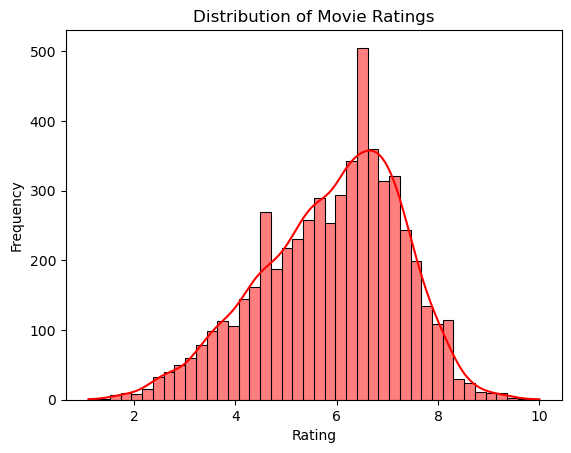

In [26]:
sns.histplot(movies_df["Rating"], kde=True, color='red')  # You can use color='skyblue' or any other color
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

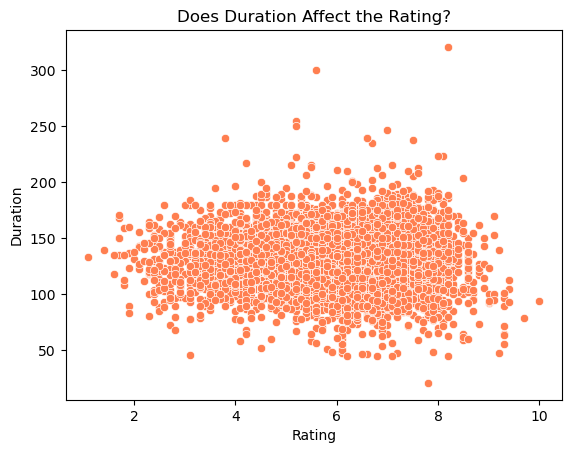

In [27]:
sns.scatterplot(x="Rating", y="Duration", data=movies_df, color='coral')  
plt.title("Does Duration Affect the Rating?")
plt.xlabel("Rating")
plt.ylabel("Duration")
plt.show()

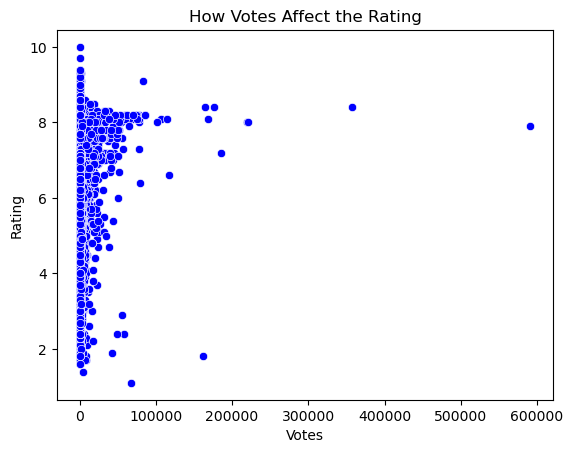

In [28]:
sns.scatterplot(x="Votes", y="Rating", data=movies_df, color='blue') 
plt.title("How Votes Affect the Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

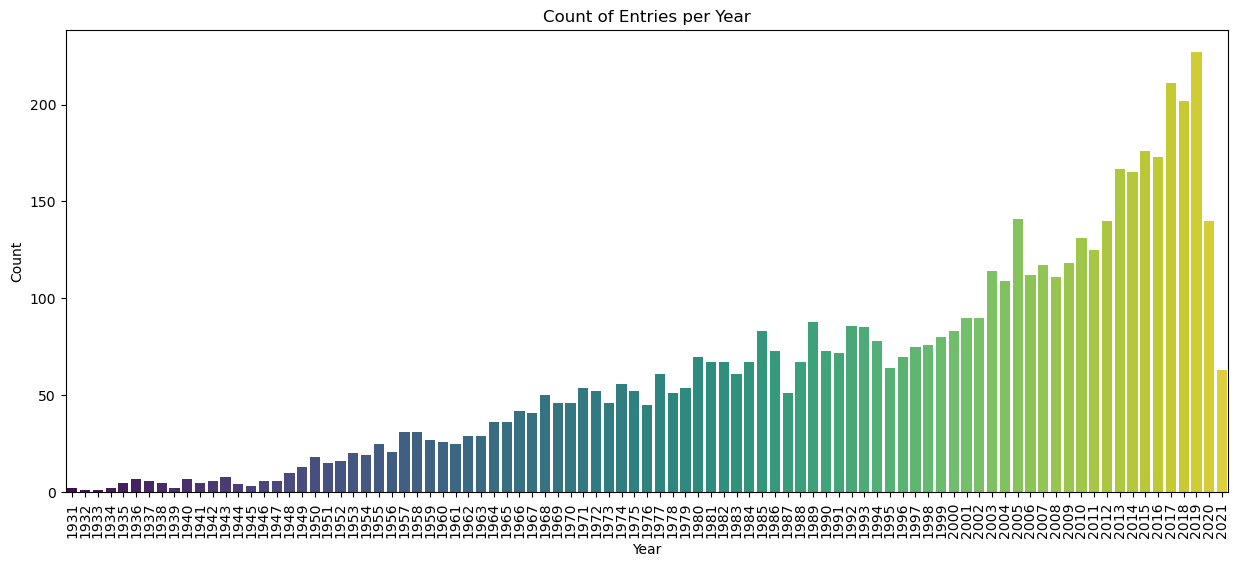

In [29]:
plt.figure(figsize=(15, 6))
sns.countplot(x=movies_df["Year"], palette='viridis')  
plt.xticks(rotation=90)
plt.title("Count of Entries per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [30]:
top_10=movies_df[["Name","Genre","Rating"]].sort_values(by="Rating",ascending=False).head(10)
print("TOP_10 based on ratings")
top_10

TOP_10 based on ratings


,Name,Genre,Rating
3146,Love Qubool Hai,"Drama, Romance",10.0
2027,Half Songs,"Music, Romance",9.7
5165,The Reluctant Crime,Drama,9.4
1897,Gho Gho Rani,"History, Romance",9.4
2574,June,Drama,9.4
4783,Sindhustan,"Documentary, Family, History",9.3
4609,Secrets of Sinauli,"Documentary, History",9.3
1919,God of gods,Documentary,9.3
3149,Love Sorries,"Comedy, Drama, Romance",9.3
692,Baikunth,Family,9.3


In [31]:
top_10=movies_df[["Name","Genre","Votes"]].sort_values(by="Votes",ascending=False).head(10)
print("TOP_10 based on votes")
top_10

TOP_10 based on votes


,Name,Genre,Votes
3088,Life of Pi,"Adventure, Drama, Fantasy",591417.0
44,3 Idiots,"Comedy, Drama",357889.0
3094,Lion,"Biography, Drama",220526.0
1823,Gandhi,"Biography, Drama, History",220118.0
5096,The Darjeeling Limited,"Adventure, Comedy, Drama",185127.0
3092,Like Stars on Earth,"Drama, Family",175810.0
4023,PK,"Comedy, Drama, Musical",168150.0
1276,Dangal,"Action, Biography, Drama",165074.0
4200,Radhe,"Action, Crime, Thriller",162455.0
1436,Dil Bechara,"Comedy, Drama, Romance",117377.0


In [32]:
# Get the top 15 directors by the number of movies
top_directors = movies_df["Director"].value_counts(ascending=False)[:15]


In [33]:
top_directors

David Dhawan            41
Mahesh Bhatt            39
Hrishikesh Mukherjee    33
Shakti Samanta          33
Ram Gopal Varma         33
Vikram Bhatt            30
Priyadarshan            29
Rama Rao Tatineni       23
Basu Chatterjee         23
K. Bapaiah              22
Yash Chopra             22
Shyam Benegal           22
Kanti Shah              21
Harmesh Malhotra        21
Shyam Ramsay            20
Name: Director, dtype: int64

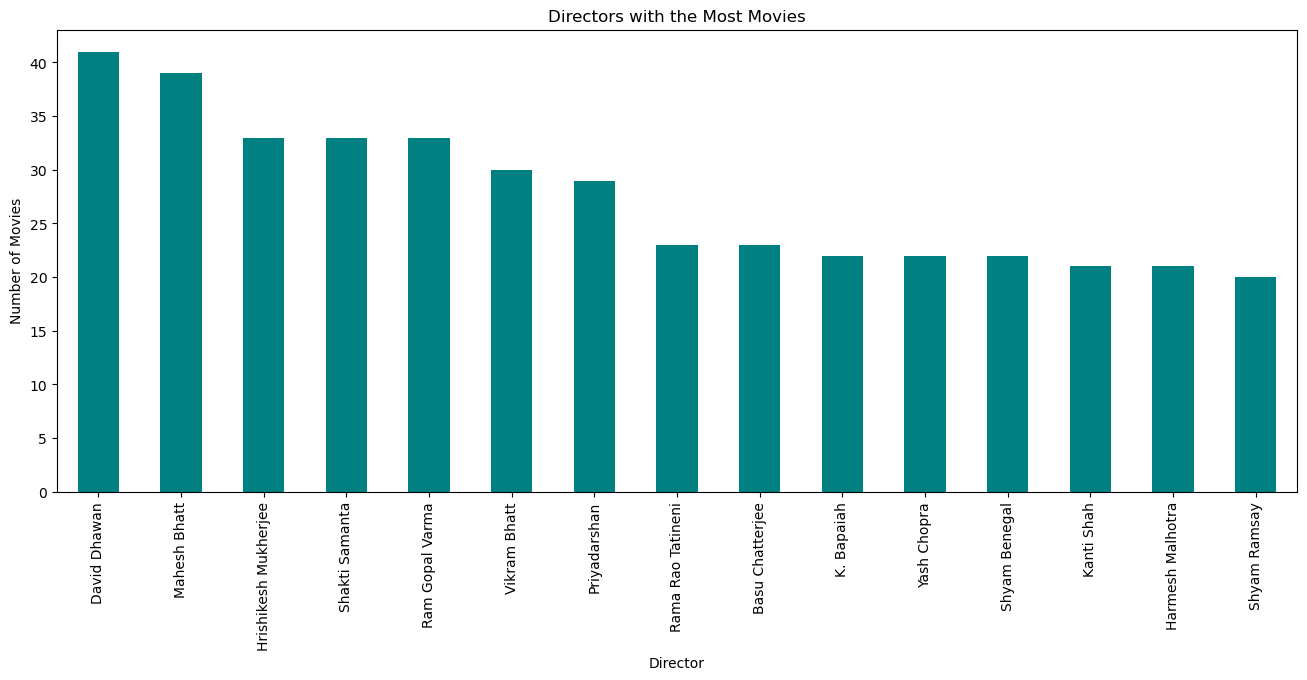

In [34]:
plt.figure(figsize=(16, 6))
top_directors.plot(kind="bar", color='teal')  
plt.title("Directors with the Most Movies")
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.show()

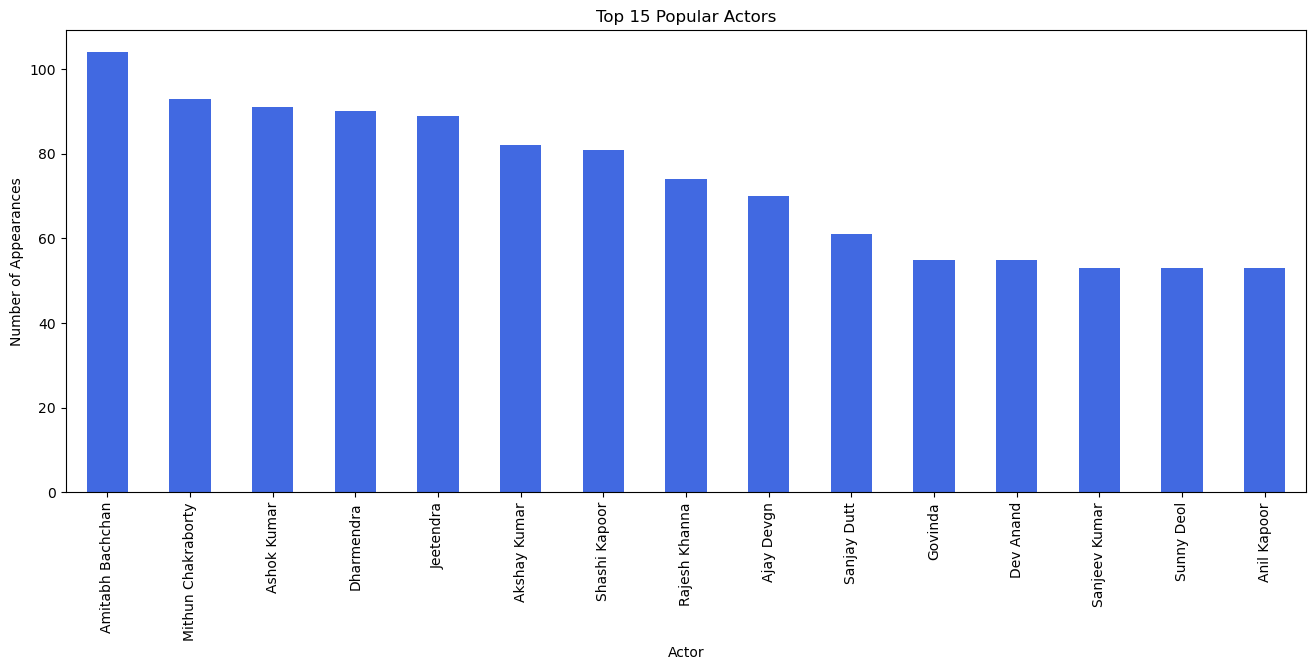

In [35]:
top_actors = movies_df["Actor 1"].value_counts(ascending=False)[:15]
plt.figure(figsize=(16, 6))
top_actors.plot(kind="bar", color='royalblue')  # Add color for better visibility
plt.title("Top 15 Popular Actors")
plt.xlabel("Actor")
plt.ylabel("Number of Appearances")
plt.xticks(rotation=90)
plt.show()

# Step 4- Modeling

In [36]:
genre_mean_rating = movies_df.groupby('Genre')['Rating'].transform('mean')
movies_df['Genre_mean_rating'] = genre_mean_rating

In [37]:
movies_df['Director_encoded'] = movies_df.groupby('Director')['Rating'].transform('mean')
movies_df['Actor_encoded'] = movies_df.groupby('Actor 1')['Rating'].transform('mean')

# Define the features and target variable
features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = movies_df[features]
y = movies_df['Rating']


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# step 5 - Model Evaluation

In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.5247
Mean Absolute Error: 0.5196
R2 Score: 0.7284


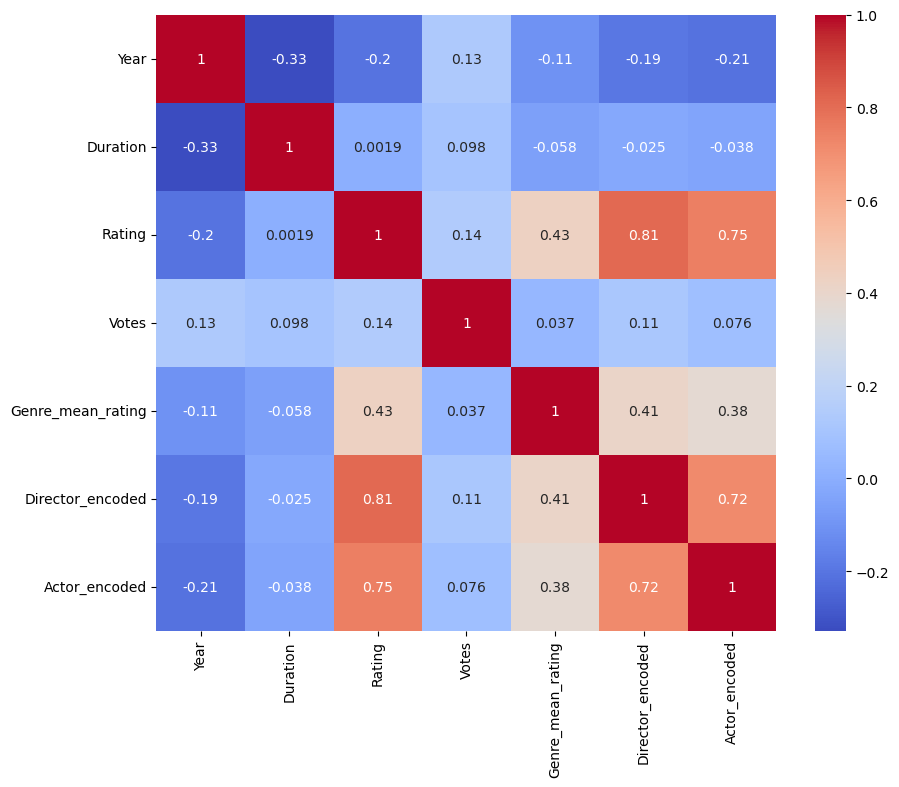

In [43]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = movies_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

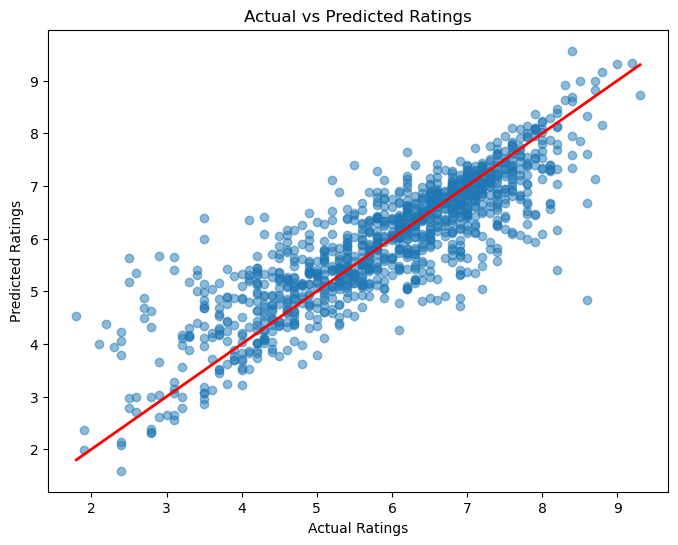

In [44]:
# Actual vs Predicted Ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


### Insights:

Top-rated movies: We identified the top 10 movies with the highest ratings, which can help in understanding what makes a movie successful.<br>
    
Top directors and actors: We found the top 15 directors and actors with the most movies, which can indicate their popularity and influence in the industry.<br>
    
Genre distribution: We analyzed the distribution of genres and found that some genres are more popular than others, which can help in understanding audience preferences.<br>
    
Year-wise ratings: We found the year with the highest average rating, which can indicate a trend or a shift in audience preferences over time.<br>
    
Correlation between features: We analyzed the correlation between features such as year, duration, votes, and rating, which can help in understanding how these features interact with each other.